# Imports

In [131]:
from pathlib import Path
from datetime import datetime
import pandas as pd
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from scipy import stats

# Global settings

In [2]:
ROOT_PATH = Path(r'Z:\Ella')
EXPERIMENT_NAME = '5_sec_const'
FILES_TO_LOAD = [
    "angle_timeseries",
    "opto_rec",
    "speed_rec", 
    "swim_info_after", # swim info = {startSwimInd   -> in frames   
                                    # endSwimInd      -> in frames
                                    # swim_duration      -> in ms
                                    # swim_bout_num      ? 
                                    # swim_max_signal     -> f/f0? 
                                    # swim_mean_signal      
                                    # swim_LR_balance      -> between 0 - 1, 1 represents imbalance 
                                    # swim_frequency } -> ?
    "swim_info_before",
    "swim_info_during"
]

FRAMES_BEFORE = 10 * 60 *400 # 10 min
FRAMES_DURING = 5 * 400 # 5 sec 
FRAMES_AFTER  = (20*60*400) - (FRAMES_BEFORE + FRAMES_DURING) # 20 min is the exp len, substarct the other stages. 

# Calculate the cut points in the global file
T0 = 0
T1 = FRAMES_BEFORE                    # End of 'Before', Start of 'During'
T2 = FRAMES_BEFORE + FRAMES_DURING    # End of 'During', Start of 'After'
T3 = T2 + FRAMES_AFTER

# Data loading

In [3]:
records = []
exp_dict = {
    EXPERIMENT_NAME: defaultdict(dict)
}
experiment_path = ROOT_PATH / EXPERIMENT_NAME

for date_dir_name in experiment_path.iterdir():
    date = datetime.strptime(date_dir_name.stem, "%Y%m%d").date()
    
    for fish_dir_name_path in (experiment_path / date_dir_name).iterdir():
        full_fish_name = fish_dir_name_path.stem.removesuffix("_Exp00").removesuffix("_" + EXPERIMENT_NAME)
        fish_id = full_fish_name.split("_")[0]
        group_name = "_".join(full_fish_name.split("_")[1:])

        records.append({
            "path": str(fish_dir_name_path),
            "date": date,
            "fish_id": fish_id,
            "group_name": group_name,
        })

        exp_dict[EXPERIMENT_NAME][group_name][fish_id] = {
            key: np.load(fish_dir_name_path / f"{key}.npy", allow_pickle=True)
            for key in FILES_TO_LOAD
        }
        
df = pd.DataFrame.from_records(records)

# Raw data exploration

## data structure

In [4]:
exp_dict.keys()

dict_keys(['5_sec_const'])

In [5]:
exp_dict["5_sec_const"].keys()  # group_id

dict_keys(['narp_neg', 'narp_pos'])

In [6]:
exp_dict["5_sec_const"]["narp_neg"].keys()  # fish id (unique only inside group)

dict_keys(['F1', 'F2', 'F3', 'F4', 'F5', 'F6'])

In [7]:
exp_dict["5_sec_const"]["narp_neg"]["F1"].keys()  # npy files

dict_keys(['angle_timeseries', 'opto_rec', 'speed_rec', 'swim_info_after', 'swim_info_before', 'swim_info_during'])

## explore per `npy`

### `angle_timeseries`

In [8]:
exp_dict["5_sec_const"]["narp_neg"]["F1"]["angle_timeseries"].shape

(479816,)

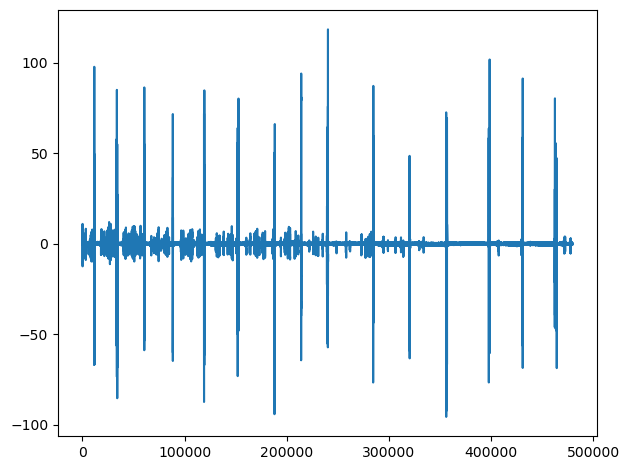

In [26]:
a = exp_dict["5_sec_const"]["narp_neg"]["F1"]["angle_timeseries"]
plt.figure
plt.plot(a)

plt.tight_layout() 
plt.show()

### `opto_rec`

In [9]:
exp_dict["5_sec_const"]["narp_neg"]["F1"]["opto_rec"].shape

(479816,)

In [10]:
exp_dict["5_sec_const"]["narp_neg"]["F1"]["opto_rec"]

array([0, 0, 0, ..., 0, 0, 0])

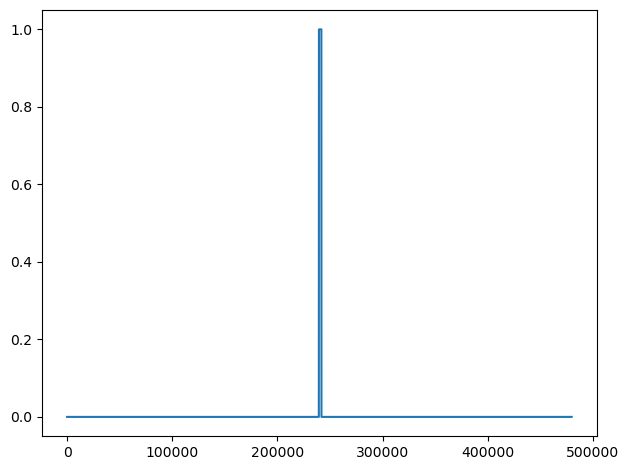

In [11]:
y = exp_dict["5_sec_const"]["narp_pos"]["F1"]["opto_rec"]
plt.figure
plt.plot(y)

plt.tight_layout() 
plt.show()

### `speed_rec`

In [12]:
exp_dict["5_sec_const"]["narp_neg"]["F1"]["speed_rec"].shape

(479816,)

In [13]:
x = exp_dict["5_sec_const"]["narp_neg"]["F1"]["speed_rec"]

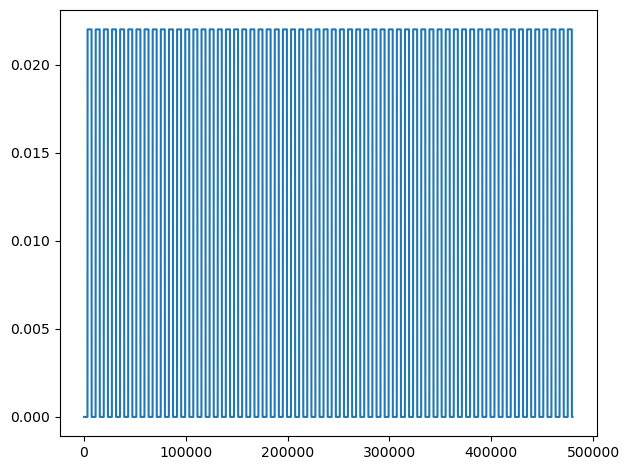

In [14]:
plt.figure
plt.plot(x)

plt.tight_layout() 
plt.show()

### `swim_info_after`

In [15]:
exp_dict["5_sec_const"]["narp_neg"]["F1"]["swim_info_after"].item()

{'startSwimInd': array([  6791.,  15905.,  16201.,  19685.,  20058.,  31021.,  31297.,
         35132.,  36923.,  37818.,  39279.,  40702.,  42629.,      0.,
         52348.,  52773.,  57099.,  64090.,  64597.,  69838.,  72065.,
         78283.,  87706.,  92056., 114122., 114463., 155798., 156166.,
        156612., 165539., 188655., 189060., 220471., 220951., 221286.,
        222389., 229795., 230158., 230653., 235729., 236052.]),
 'endSwimInd': array([  6817.,  15929.,  16270.,  19712.,  20069.,  31094.,  31385.,
         35222.,  37022.,  37891.,  39355.,  40805.,  42837.,      0.,
         52359.,  52833.,  57149.,  64130.,  64639.,  69914.,  72119.,
         78539.,  87729.,  92118., 114243., 114971., 155935., 156288.,
        156726., 165604., 188694., 189231., 220674., 221050., 221450.,
        222431., 229847., 230234., 230699., 235824., 236111.]),
 'swim_duration': array([  65. ,   60. ,  172.5,   67.5,   27.5,  182.5,  220. ,  225. ,
         247.5,  182.5,  190. ,  257.5,  52

In [16]:
keys_lst = list(exp_dict["5_sec_const"]["narp_neg"]["F1"]["swim_info_after"].item().keys())
for k in keys_lst:
    print(k, "     shape: ", exp_dict["5_sec_const"]["narp_neg"]["F1"]["swim_info_after"].item()[k].shape)

startSwimInd      shape:  (41,)
endSwimInd      shape:  (41,)
swim_duration      shape:  (41,)
swim_bout_num      shape:  (41,)
swim_max_signal      shape:  (41,)
swim_mean_signal      shape:  (41,)
swim_LR_balance      shape:  (41,)
swim_frequency      shape:  (41,)


### `swim_info_before`

In [17]:
exp_dict["5_sec_const"]["narp_neg"]["F1"]["swim_info_before"].item()

{'startSwimInd': array([2.90000e+01, 2.38700e+03, 3.20600e+03, 5.96300e+03, 7.30800e+03,
        8.02200e+03, 8.67300e+03, 9.51500e+03, 1.02350e+04, 1.14260e+04,
        1.81010e+04, 1.85140e+04, 2.00930e+04, 2.05180e+04, 2.07300e+04,
        2.13800e+04, 2.34400e+04, 2.38710e+04, 2.41090e+04, 2.53330e+04,
        2.60190e+04, 2.68110e+04, 2.76050e+04, 2.88430e+04, 2.99160e+04,
        3.13860e+04, 3.22970e+04, 3.34640e+04, 3.39510e+04, 3.98000e+04,
        4.01310e+04, 4.04530e+04, 4.21220e+04, 4.25030e+04, 4.42730e+04,
        4.51430e+04, 4.69920e+04, 4.81580e+04, 4.91130e+04, 4.99080e+04,
        5.06970e+04, 5.16830e+04, 5.33450e+04, 5.57360e+04, 5.63780e+04,
        5.68420e+04, 5.84870e+04, 6.03980e+04, 6.05340e+04, 6.73390e+04,
        6.97650e+04, 7.00600e+04, 7.19150e+04, 7.23360e+04, 7.36950e+04,
        7.45040e+04, 7.68330e+04, 7.75390e+04, 7.97230e+04, 8.00580e+04,
        8.13550e+04, 8.23960e+04, 8.31190e+04, 8.47740e+04, 8.84130e+04,
        9.63720e+04, 9.66320e+04, 9

In [18]:
keys_lst = list(exp_dict["5_sec_const"]["narp_neg"]["F1"]["swim_info_before"].item().keys())
for k in keys_lst:
    print(k, "     shape: ", exp_dict["5_sec_const"]["narp_neg"]["F1"]["swim_info_before"].item()[k].shape)

startSwimInd      shape:  (131,)
endSwimInd      shape:  (131,)
swim_duration      shape:  (131,)
swim_bout_num      shape:  (131,)
swim_max_signal      shape:  (131,)
swim_mean_signal      shape:  (131,)
swim_LR_balance      shape:  (131,)
swim_frequency      shape:  (131,)


### `swim_info_during`

In [19]:
exp_dict["5_sec_const"]["narp_neg"]["F1"]["swim_info_during"].item()

{'startSwimInd': array([140., 493., 766., 971.]),
 'endSwimInd': array([ 277.,  537.,  856., 1265.]),
 'swim_duration': array([342.5, 110. , 225. , 735. ]),
 'swim_bout_num': array([ 46.,  24.,  51., 145.]),
 'swim_max_signal': array([3.05871186, 0.38568374, 0.44378919, 0.52889745]),
 'swim_mean_signal': array([0.23964121, 0.16595304, 0.1520898 , 0.16234459]),
 'swim_LR_balance': array([0.55489856, 0.04040048, 0.01047377, 0.09491629]),
 'swim_frequency': array([ 68.70229008, 112.19512195, 116.27906977,  98.63013699])}

In [20]:
keys_lst = list(exp_dict["5_sec_const"]["narp_neg"]["F1"]["swim_info_during"].item().keys())
for k in keys_lst:
    print(k, "     shape: ", exp_dict["5_sec_const"]["narp_neg"]["F1"]["swim_info_during"].item()[k].shape)

startSwimInd      shape:  (4,)
endSwimInd      shape:  (4,)
swim_duration      shape:  (4,)
swim_bout_num      shape:  (4,)
swim_max_signal      shape:  (4,)
swim_mean_signal      shape:  (4,)
swim_LR_balance      shape:  (4,)
swim_frequency      shape:  (4,)


### `preprocess`

In [41]:
# Create a deep copy to ensure raw data remains untouched
processed_dict = copy.deepcopy(exp_dict)

FS = 400  # Sampling frequency

for exp_name, groups in processed_dict.items():
    for group_name, fishes in groups.items():
        for fish_id, data in fishes.items():

            # Did this fish load all required files?
            missing = [f for f in FILES_TO_LOAD if f not in data.keys()]
            if missing:
                print(f"{fish_id}: Missing files {missing}")
                del exp_dict[processed_dict][group][fish_id]
                continue 
            
            # --- Binarization of Opto and speed of VR Record ---
            # Any signal > 0 is considered 'On' (1)
            for recording in ['opto_rec', 'speed_rec']:
                if recording in data:
                    data['opto_bin'] = (data['opto_rec'] > 0).astype(int)
                    data['speed_bin'] = (data['speed_rec'] > 0).astype(int)

                        # Create the stage-specific arrays
                        # We add these as NEW keys to the fish dictionary
            
                        # BEFORE (Frames 0 to T1)
                    data['opto_before']  = data['opto_bin'][T0:T1]
                    data['speed_before'] = data['speed_bin'][T0:T1]
            
                        # DURING (Frames T1 to T2)
                    data['opto_during']  = data['opto_bin'][T1:T2]
                    data['speed_during'] = data['speed_bin'][T1:T2]
            
                        # AFTER (Frames T2 to T3)
                    data['opto_after']   = data['opto_bin'][T2:T3]
                    data['speed_after']  = data['speed_bin'][T2:T3]
                    
            
            # --- Process Swim Info (Before, During, After) ---
            for stage in ['swim_info_before', 'swim_info_during', 'swim_info_after']:
                if stage in data:
                    # Access the dictionary inside the numpy object
                    swims = data[stage].item() 
                    
                    # Convert indices to time in ms
                    # Start/End are frames -> ms: (frame / 400) * 1000
                    swims['start_ms'] = (swims['startSwimInd'] / FS) * 1000
                    swims['end_ms'] = (swims['endSwimInd'] / FS) * 1000
                    
                    # Create Filtering Mask
                    # Criteria: Duration between 50-400ms AND Frequency > 0 
                    mask = (
                        (swims['swim_duration'] > 50) & 
                        (swims['swim_duration'] < 400) & 
                        (swims['swim_frequency'] > 0) &
                        (swims['startSwimInd'] > 0) # Removing 'fake' bouts at index 0
                    )
                    
                    # Apply Mask to all keys in the swim dictionary
                    for key in swims.keys():
                        swims[key] = swims[key][mask]
                    
                    # Update the dictionary in processed_dict
                    data[stage] = swims

print("Preprocessing Complete")

Preprocessing Complete


In [47]:
processed_dict['5_sec_const']['narp_neg']['F1'].keys()

dict_keys(['angle_timeseries', 'opto_rec', 'speed_rec', 'swim_info_after', 'swim_info_before', 'swim_info_during', 'opto_bin', 'speed_bin', 'opto_before', 'speed_before', 'opto_during', 'speed_during', 'opto_after', 'speed_after'])

In [38]:
processed_dict['5_sec_const']['narp_neg']['F1']['swim_info_before'].keys()

dict_keys(['startSwimInd', 'endSwimInd', 'swim_duration', 'swim_bout_num', 'swim_max_signal', 'swim_mean_signal', 'swim_LR_balance', 'swim_frequency', 'start_ms', 'end_ms'])

### `OMR vs static clasification and means for swim info`

In [43]:
## TODO: make this into a func, sasparate turning the dict into pd from the omr 

# This list will hold our summary data before we turn it into a DataFrame
summary_data = []

# List of parameters you want to analyze
PARAMETERS_TO_ANALYZE = [
    'swim_mean_signal', 
    'swim_max_signal', 
    'swim_duration', 
    'swim_LR_balance', 
    'swim_frequency'
]

# Define stage pairs
stage_pairs = [
    ('speed_before', 'swim_info_before'),
    ('speed_during', 'swim_info_during'),
    ('speed_after',  'swim_info_after')
]

for exp_name, groups in processed_dict.items():
    for group_name, fishes in groups.items():
        for fish_id, data in fishes.items():
            
            for speed_key, swim_key in stage_pairs:
                if speed_key not in data or swim_key not in data:
                    continue

                swims = data[swim_key]
                speed_trace = data[speed_key]
                
                # --- 1. ALIGNMENT LOGIC ---
                start_inds = swims['startSwimInd'].astype(int)
                
                # Safety Filter
                valid_inds_mask = start_inds < len(speed_trace)
                clean_inds = start_inds[valid_inds_mask]
                
                # Get Condition (0 or 1)
                bout_conditions = speed_trace[clean_inds]
                
                # --- 2. AGGREGATION LOOP ---
                for cond_val, cond_name in zip([0, 1], ['Static', 'OMR']):
                    
                    # Create the Condition Mask
                    mask_cond = (bout_conditions == cond_val)
                    
                    # Initialize the row with metadata
                    row_dict = {
                        'Group': group_name,
                        'FishID': fish_id,
                        'Stage': swim_key.replace('swim_info_', ''),
                        'Condition': cond_name,
                        'Bout_Count': np.sum(mask_cond)
                    }
                    
                    # --- YOUR PARAMETER LOOP GOES HERE ---
                    for param in PARAMETERS_TO_ANALYZE:
                        # 1. Retrieve raw array
                        # 2. Apply Safety Mask (valid_inds_mask)
                        # 3. Apply Condition Mask (mask_cond)
                        if param in swims:
                            values = swims[param][valid_inds_mask][mask_cond]
                            
                            if len(values) > 0:
                                row_dict[f'Mean_{param}'] = np.mean(values)
                            else:
                                row_dict[f'Mean_{param}'] = np.nan
                    
                    # Add the finished row to the list
                    summary_data.append(row_dict)

# Create final DataFrame
df_results = pd.DataFrame(summary_data)

# Check the results
print(df_results.head())
print(f"Columns created: {df_results.columns.tolist()}")

      Group FishID   Stage Condition  Bout_Count  Mean_swim_mean_signal  \
0  narp_neg     F1  before    Static          76               5.095770   
1  narp_neg     F1  before       OMR          47               6.341304   
2  narp_neg     F1  during    Static           3               0.185895   
3  narp_neg     F1  during       OMR           0                    NaN   
4  narp_neg     F1   after    Static          19               0.365330   

   Mean_swim_max_signal  Mean_swim_duration  Mean_swim_LR_balance  \
0              8.689408          246.184211              0.082992   
1             12.127734          168.882979              0.151791   
2              1.296062          225.833333              0.201924   
3                   NaN                 NaN                   NaN   
4              0.915933          144.473684              0.155227   

   Mean_swim_frequency  
0            22.218810  
1            21.145465  
2            99.058827  
3                  NaN  
4        

In [22]:
## TODO: otpo clarifying 
##       mean of all traces - with and without OMR 
##       count num of bouts per time bin 
##       frezing rate mean
##       RL balance per time bin

### `t-test functions`

In [132]:
def add_stats_bracket(ax, x1, x2, y, h, p_val, color='k'):
    """Draws a bracket with significance stars."""
    if p_val >= 0.05: return # Do not draw if not significant

    # Determine significance level
    sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*"
    
    # Draw bracket
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c=color)
    
    # Add text
    ax.text((x1+x2)/2, y+h, sig, ha='center', va='bottom', color=color, 
            fontsize=12, fontweight='bold')

In [133]:
def check_significance(df, metric_col, subject_col, group, stage, ax, x_positions, y_max):
    """
    Runs Paired t-tests and draws brackets.
    Returns the new y_max to avoid overlapping brackets.
    """
    #  PAIRED T-TEST (Within Group: Static vs OMR)
    # ------------------------------------------------
    g_data = df[(df['Group'] == group) & (df['Stage'] == stage)]
    pivot = g_data.pivot(index=subject_col, columns='Condition', values=metric_col).dropna()
    
    if len(pivot) > 1:
        t, p_paired = stats.ttest_rel(pivot['Static'], pivot['OMR'])
        
        # Draw Paired Bracket (Small, close to bars)
        if p_paired < 0.05:
            x1 = x_positions[(group, 'Static')]
            x2 = x_positions[(group, 'OMR')]
            h = y_max * 0.03
            y = y_max * 1.05
            add_stats_bracket(ax, x1, x2, y, h, p_paired, color='black')
            y_max = y + h # Increase y_max so next bracket is higher

    return y_max

In [134]:
def check_unpaired_significance(df, metric_col, stage, ax, x_positions, y_max):
    """
    Runs Unpaired t-test (Neg vs Pos) for BOTH Static and OMR conditions.
    Draws BLACK brackets for both.
    """
    # Check both conditions
    for cond in ['Static', 'OMR']:
        
        # 1. Get data (Neg vs Pos)
        neg_data = df[(df['Group'] == 'narp_neg') & (df['Stage'] == stage) & (df['Condition'] == cond)][metric_col]
        pos_data = df[(df['Group'] == 'narp_pos') & (df['Stage'] == stage) & (df['Condition'] == cond)][metric_col]
        
        if len(neg_data) > 0 and len(pos_data) > 0:
            # 2. Run Test
            t, p_unpaired = stats.ttest_ind(neg_data, pos_data, equal_var=False)
            
            # 3. Draw Bracket if Significant
            if p_unpaired < 0.05:
                x1 = x_positions[('narp_neg', cond)]
                x2 = x_positions[('narp_pos', cond)]
                
                h = y_max * 0.03
                # Static bracket at 1.15x height, OMR bracket higher at 1.28x to avoid overlap
                y_draw = y_max * 1.15 if cond == 'Static' else y_max * 1.28
                
                # All Black
                add_stats_bracket(ax, x1, x2, y_draw, h, p_unpaired, color='black')
                print(f"  Stage {stage} ({cond}): Unpaired Significance (p={p_unpaired:.4f})")

### `plotting function:`

In [137]:
def get_label_with_units(metric_col):
    """
    Returns a formatted label string with the correct units based on your specific columns.
    """
    # Map your columns to their units
    units = {
        'Bout_Count':            '(#)',         # Count (Number of bouts)
        'Mean_swim_mean_signal': '(a.u.)',      # Arbitrary Units (Signal intensity)
        'Mean_swim_max_signal':  '(a.u.)',      # Arbitrary Units
        'Mean_swim_duration':    '(ms)',        # Duration 
        'Mean_swim_LR_balance':  '(Index)',     # Left/Right Balance (0 to 1)
        'Mean_swim_frequency':   '(bouts/min)'         # Frequency 
    }
    
    # Get the unit, default to empty string if not found
    unit_str = units.get(metric_col, "")
    
    # Format label: "Mean Swim Frequency (Hz)"
    clean_name = metric_col.replace('_', ' ').replace('Mean swim', '').strip().capitalize()
    
    # Special casing for cleaner names
    if metric_col == 'Bout_Count': clean_name = "Bout Count"
    if metric_col == 'Mean_swim_LR_balance': clean_name = "L/R Balance"
    
    return f"{clean_name} {unit_str}"

In [138]:
# --- MAIN PLOTTING FUNCTION ---
def plot_omr_final(df, metric_col, subject_col='FishID'):
    
    # Setup
    stages = ['before', 'during', 'after']
    groups = ['narp_neg', 'narp_pos']
    conditions = ['Static', 'OMR']
    
    # Colors
   # --- BLACK & CYAN COLOR SCHEME ---
    colors = {
        # Control (Black/Gray Theme)
        ('narp_neg', 'Static'): '#E0E0E0', # Very Light Gray
        ('narp_neg', 'OMR'):    '#616161', # Dark Gray
        
        # Experimental (Cyan Theme)
        ('narp_pos', 'Static'): '#E0F7FA', # Very Light Cyan
        ('narp_pos', 'OMR'):    '#00ACC1'  # Vibrant Cyan
    }
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    bar_width = 0.18
    # Offsets relative to stage center
    offsets = {
        ('narp_neg', 'Static'): -1.5 * bar_width - 0.04,
        ('narp_neg', 'OMR'):    -0.5 * bar_width - 0.04,
        ('narp_pos', 'Static'):  0.5 * bar_width + 0.04,
        ('narp_pos', 'OMR'):     1.5 * bar_width + 0.04
    }
    
    # Storage for trajectory lines: keys are (Group, FishID) to ensure uniqueness
    trajectory_coords = {} 

    print(f"=== STATISTICAL SUMMARY: {metric_col} ===\n")

    for i, stage in enumerate(stages):
        stage_center = i
        stage_max_height = 0
        
        # Store exact X positions for this stage to pass to stats function
        x_locs = {} 
        
        for group in groups:
            g_data = df[(df['Group'] == group) & (df['Stage'] == stage)]
            
            for cond in conditions:
                # Draw Bars
                vals = g_data[g_data['Condition'] == cond][metric_col]
                mean = vals.mean()
                sem = vals.sem()
                x_pos = stage_center + offsets[(group, cond)]
                x_locs[(group, cond)] = x_pos
                
                ax.bar(x_pos, mean, bar_width, yerr=sem, color=colors[(group, cond)], 
                       capsize=3, edgecolor='black', linewidth=0.5, alpha=0.6, zorder=1)
                
                if not vals.empty: stage_max_height = max(stage_max_height, vals.max())

            # Draw Points & Paired Lines (Static -> OMR)
            for fish in g_data[subject_col].unique():
                fish_d = g_data[g_data[subject_col] == fish]
                
                # Check if we have both conditions for this fish
                if len(fish_d) < 2: continue 

                try:
                    y_static = fish_d[fish_d['Condition'] == 'Static'][metric_col].values[0]
                    y_omr = fish_d[fish_d['Condition'] == 'OMR'][metric_col].values[0]
                    
                    x_static = stage_center + offsets[(group, 'Static')]
                    x_omr = stage_center + offsets[(group, 'OMR')]
                    
                    # Plot solid response line
                    ax.plot([x_static, x_omr], [y_static, y_omr], 
                            color='gray', alpha=0.4, linewidth=1, zorder=2)
                    
                    # Plot dots
                    ax.scatter([x_static, x_omr], [y_static, y_omr], 
                               color='black', s=15, alpha=0.5, zorder=3, edgecolors='white', linewidth=0.5)

                    # Store coords for the dashed trajectory lines
                    # Key must include GROUP to prevent overwriting if FishIDs are duplicated across groups
                    unique_fish_key = (group, fish)
                    if unique_fish_key not in trajectory_coords:
                        trajectory_coords[unique_fish_key] = {'Static': {}, 'OMR': {}}
                    
                    trajectory_coords[unique_fish_key]['Static'][i] = (x_static, y_static)
                    trajectory_coords[unique_fish_key]['OMR'][i] = (x_omr, y_omr)

                except IndexError:
                    continue

            # Check Paired Stats (Updates stage_max_height to avoid overlaps)
            stage_max_height = check_significance(df, metric_col, subject_col, group, stage, 
                                                  ax, x_locs, stage_max_height)

        # Check Unpaired Stats (Neg vs Pos)
        check_unpaired_significance(df, metric_col, stage, ax, x_locs, stage_max_height)

    # Draw Stage Trajectories (Dashed Lines)
    # for key, conditions_data in trajectory_coords.items():
    #     for cond_name, time_points in conditions_data.items():
    #         sorted_stages = sorted(time_points.keys())
    #         if len(sorted_stages) > 1:
    #             xs = [time_points[s][0] for s in sorted_stages]
    #             ys = [time_points[s][1] for s in sorted_stages]
    #             ax.plot(xs, ys, color='gray', linestyle='--', alpha=0.3, linewidth=0.8, zorder=1)

    # Formatting
    ax.set_xticks(range(len(stages)))
    ax.set_xticklabels([s.capitalize() for s in stages], fontsize=13)
    ax.set_ylabel(get_label_with_units(metric_col), fontsize=13)
    ax.set_title(f"OMR Vs. Static Response in Stages: {metric_col}", fontsize=15)
    
    # Legend
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D
    legend_elements = [
        Patch(facecolor=colors[('narp_neg', 'Static')], label='Neg Static'),
        Patch(facecolor=colors[('narp_neg', 'OMR')], label='Neg OMR'),
        Patch(facecolor=colors[('narp_pos', 'Static')], label='Pos Static'),
        Patch(facecolor=colors[('narp_pos', 'OMR')], label='Pos OMR'),
        Line2D([0], [0], color='gray', lw=1, label='static to OMR'),
        Line2D([0], [0], color='gray', lw=1, linestyle='--', label='Stages')
    ]
    ax.legend(handles=legend_elements, loc='upper left', ncol=3, frameon=True)
    
    sns.despine()
    plt.tight_layout()
    plt.show()

=== STATISTICAL SUMMARY: Mean_swim_duration ===



C:\Users\Ella\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
C:\Users\Ella\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
C:\Users\Ella\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
C:\Users\Ella\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


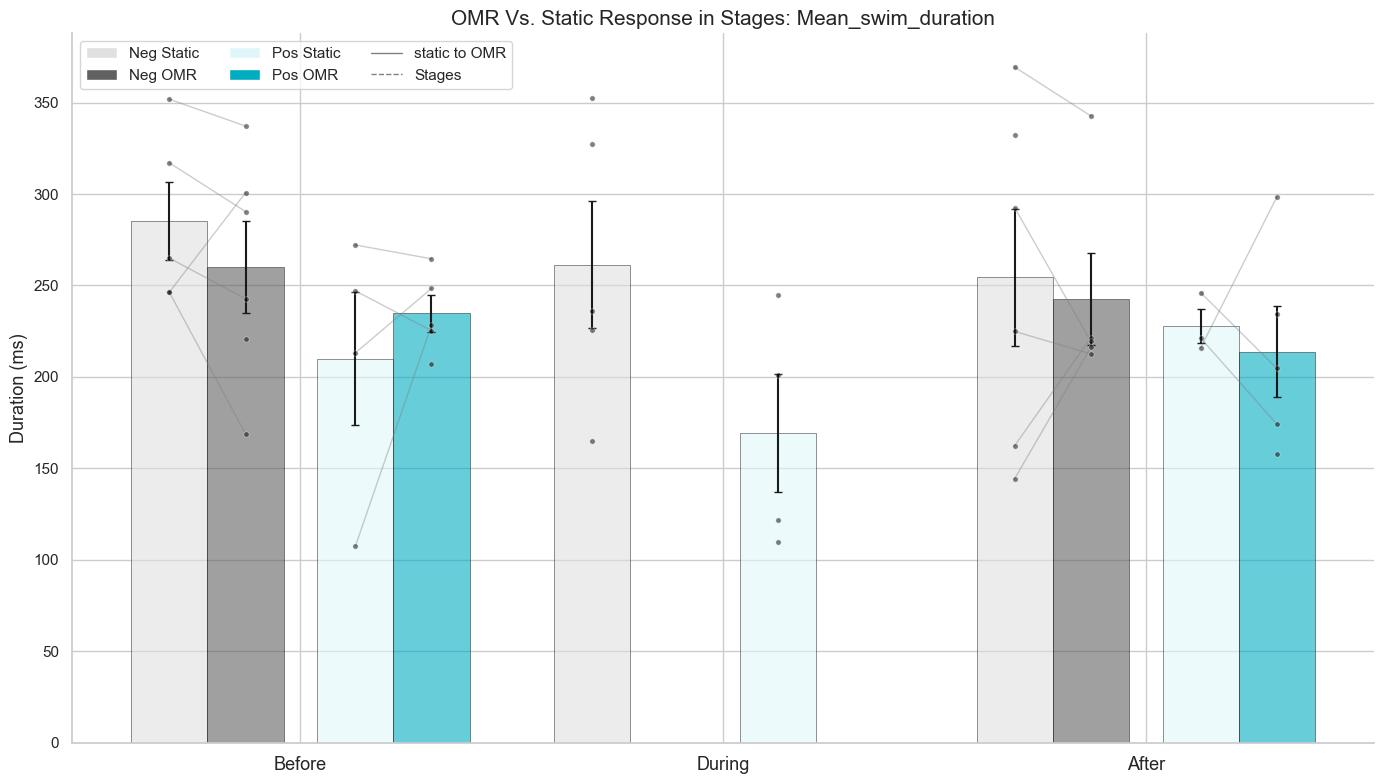

=== STATISTICAL SUMMARY: Bout_Count ===



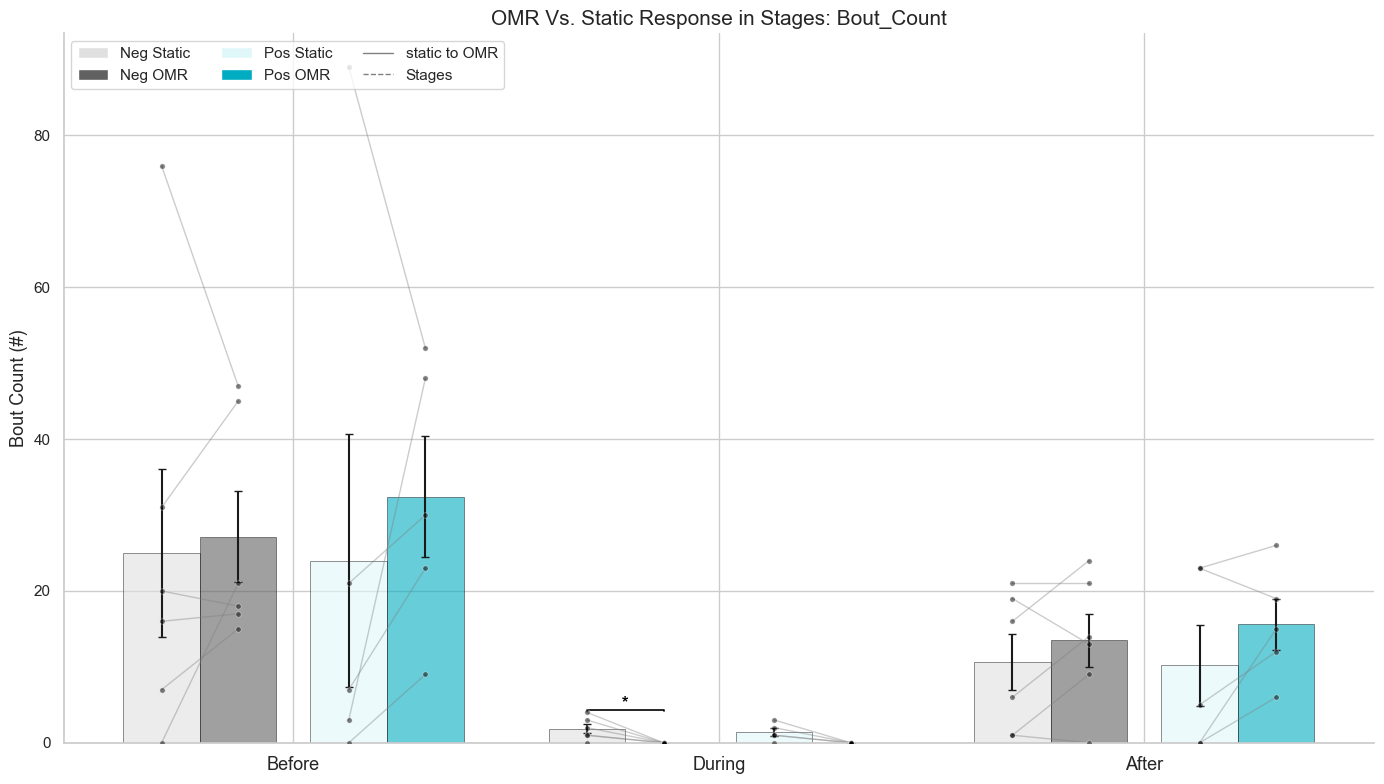

=== STATISTICAL SUMMARY: Mean_swim_frequency ===



C:\Users\Ella\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
C:\Users\Ella\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
C:\Users\Ella\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
C:\Users\Ella\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


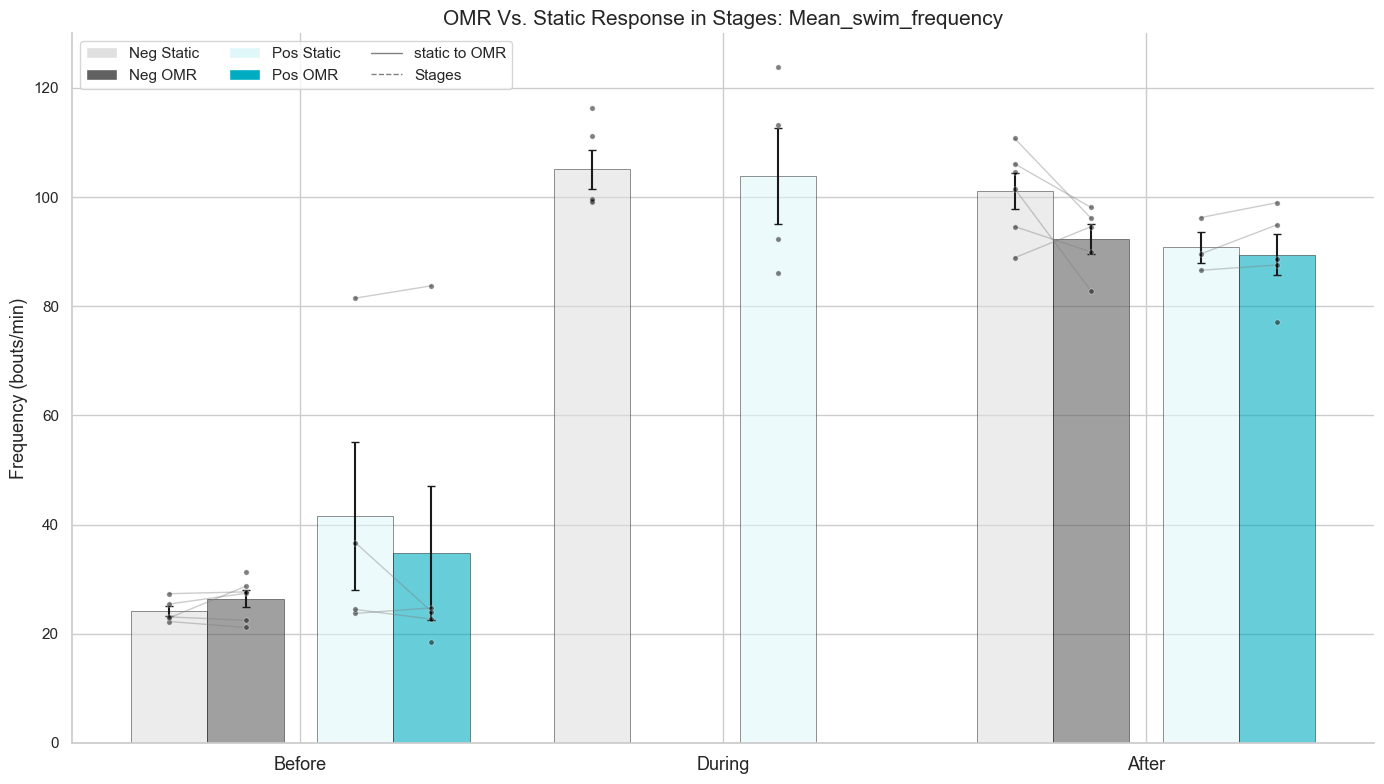

In [139]:
# Run
plot_omr_final(df_results, 'Mean_swim_duration')
plot_omr_final(df_results, 'Bout_Count')
plot_omr_final(df_results, 'Mean_swim_frequency')